In [115]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
import shire as sh
import numpy as np

### Preprocessing Part

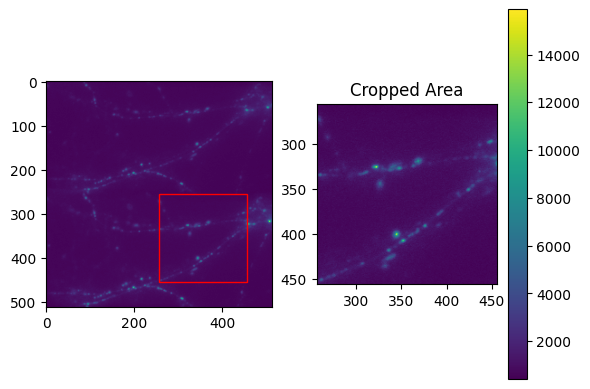

In [179]:
images = sh.ImageSeries(path="../../GitHub_Data/Particle_Tracking/bdnf rfp 600ap 3mW.tif")
cropped_images = images.crop([256, 256], 200, 200, illustrate=True)

Smoothing done, the shape of the filtered images is (1593, 200, 200)


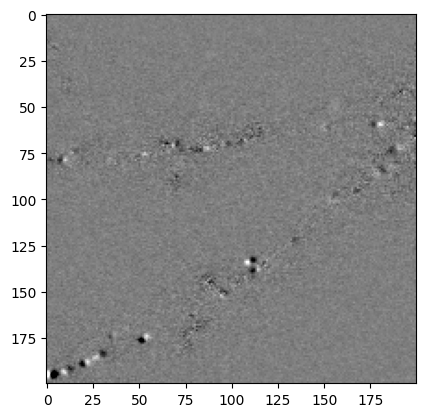

array([[  65.08470503,  -46.91364569,  -83.84953059, ...,  -12.38837264,
         -71.01039223,   27.79415567],
       [ -37.82223732,    5.29656412,  -74.20899051, ...,  -29.39257649,
          -2.81148759,  -11.2856774 ],
       [ -36.27168562,  -66.36105268,   13.95722517, ...,   84.81054205,
         -50.17559693, -128.57963246],
       ...,
       [ 422.87044953,  443.3173787 , -133.37513362, ...,   -5.92065474,
         100.01847416,   44.15055118],
       [  46.03227743,   41.48679421,   36.56164283, ...,    3.4019888 ,
          -1.72688339,   -4.88215804],
       [ -56.22305576, -123.40710193, -117.25713562, ...,   -4.71695575,
         -12.00019649,   29.77501662]])

In [180]:
images = cropped_images.smooth(illustrate=False)
bgrm_images = images.remove_background(separation=5)
bgrm_images.head(illustrate=True)

### Recovery Part

In [181]:
from recovery import Recovery
recovery = Recovery(sigma=(0.2,0.2), size=(8,8), scale=(6,6), n_directions=23)
print(recovery.stage)
recovery.compute_flow(bgrm_images)
print(recovery.stage)
recovery.estimate(thresholding=20)
print(recovery.stage)

Initialised
Flow Computed
Direction Estimated, the info is stored in df_p and df_d
Direction Estimated


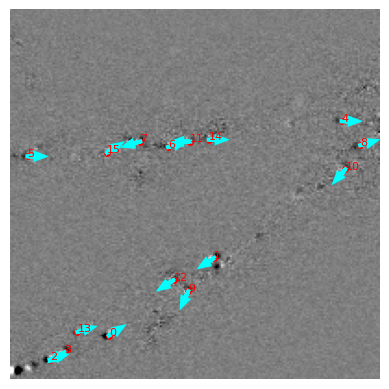

In [182]:
recovery.plot()

In [183]:
recovery.track_all()

Particle: 0 / 16
Frame: 0 / 90
Frame: 5 / 90
Frame: 10 / 90
Frame: 15 / 90
Frame: 20 / 90
Frame: 25 / 90
Frame: 30 / 90
Frame: 35 / 90
Frame: 40 / 90
Frame: 45 / 90
Frame: 50 / 90
Frame: 55 / 90
Frame: 60 / 90
Frame: 65 / 90
Frame: 70 / 90
Frame: 75 / 90
Frame: 80 / 90
Frame: 85 / 90
Particle: 1 / 16
Frame: 0 / 90
Frame: 5 / 90
Frame: 10 / 90
Frame: 15 / 90
Frame: 20 / 90
Frame: 25 / 90
Frame: 30 / 90
Frame: 35 / 90
Frame: 40 / 90
Frame: 45 / 90
Frame: 50 / 90
Frame: 55 / 90
Frame: 60 / 90
Frame: 65 / 90
Frame: 70 / 90
Frame: 75 / 90
Frame: 80 / 90
Frame: 85 / 90
Particle: 2 / 16
Frame: 0 / 90
Frame: 5 / 90
Frame: 10 / 90
Frame: 15 / 90
Frame: 20 / 90
Frame: 25 / 90
Frame: 30 / 90
Frame: 35 / 90
Frame: 40 / 90
Frame: 45 / 90
Frame: 50 / 90
Frame: 55 / 90
Frame: 60 / 90
Frame: 65 / 90
Frame: 70 / 90
Frame: 75 / 90
Frame: 80 / 90
Frame: 85 / 90
Particle: 3 / 16
Frame: 0 / 90
Frame: 5 / 90
Frame: 10 / 90
Frame: 15 / 90
Frame: 20 / 90
Frame: 25 / 90
Frame: 30 / 90
Frame: 35 / 90
Frame: 40 

In [184]:
recovery.df_all

,Frame,Position,Direction,Speed,Particle
0,0,"[176, 53]",0.571199,0.0000,0
1,5,"[175, 54]",0.571199,0.0970,0
2,10,"[174, 55]",0.285599,0.0945,0
3,15,"[174, 57]",0.571199,0.0860,0
4,20,"[173, 57]",0.571199,0.0500,0
...,...,...,...,...,...
14,70,"[70, 65]",0.856798,0.1000,15
15,75,"[71, 66]",0.000000,0.0000,15
16,80,"[72, 90]",0.285599,0.1000,15
17,85,"[73, 90]",2.855993,0.1000,15
